#  Plotting and Visualization

o Visualizations (plots) is an important task in data analysis. 

  - part of exploratory process
  
  - help identify outliers or needed data transformations
  
  - generating ideas for models.
  
  - interactive visualisations on the web.
  
o Chapter focuses on matplotlib and libraries that build on top of it.

## matplotlib Primer

o matplotlib is a desktop plotting package designed for creating (mostly two-dimensional) publication-quality plots.  

o matplotlib has spawned a number of add-on toolkits for data visualization that use matplotlib for their underlying plotting.
           
### Figures and Subplots

o  Plots in matplotlib reside within a Figure object. 

o  The Figure object a number of options

  -  figsize - guarantees the figure has a certain size and aspect ratio if saved to disk.

  -  add_subplot - create one or more subplots
  
o  matplotlib documentation: https://matplotlib.org/

o  Table 9-1. pyplot.subplots options

[0 1 2 3 4 5 6 7 8 9]


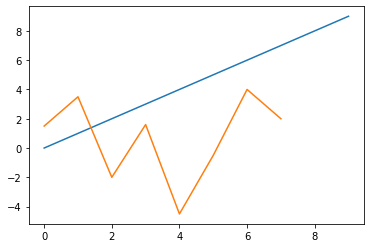

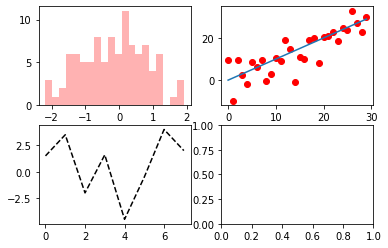

In [2]:
import matplotlib.pyplot as plt
import numpy as np

data = np.arange(10)
print(data)
plt.plot(data)

arr = np.array([1.5, 3.5, -2, 1.6, -4.5, -0.5, 4, 2])
plt.plot(arr)

fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)  # splits into four plots (2x2 - upper left quadrant)
ax2 = fig.add_subplot(2, 2, 2)  # splits into four plots (2x2 - upper right quadrant)  
ax3 = fig.add_subplot(2, 2, 3)  # splits into four plots (2x2 - lower left quadrant)
ax4 = fig.add_subplot(2, 2, 4)  # splits into four plots (2x2 - lower right quadrant)

#bins used to describe how many bars are to created in the histogram
ax1.hist(np.random.randn(100), bins=20, color='r', alpha=0.3)
#scatter plot takes x, y axis
ax2.scatter(np.arange(30), np.arange(30) + 5 * np.random.randn(30), color='r')
#adding another plot to the above scatter plot
ax2.plot(np.arange(30))
ax3.plot(arr, 'k--')



### Other things

o  Adjusting the spacing around subplots

o  Colors, Markers, and Line Styles

o  Ticks, Labels, and Legends

o  Annotations and Drawing on a Subplot

    - CSV File - https://gitlab.com/Glf9832/pydata-notebook/-/blob/17670dd2026bedd7e9cebba649c1f50d9c34b86c/examples/spx.csv
    
o  Saving Plots to File

    - Table 9-2. Figure.savefig options

o  matplotlib Configuration


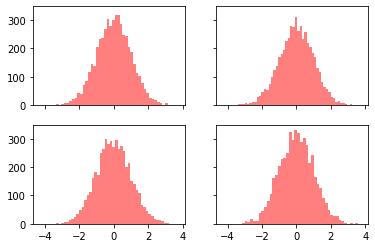

In [15]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(5000), bins=50, color='r', alpha=0.5)
# plt.subplots_adjust(wspace=.5, hspace=.5)


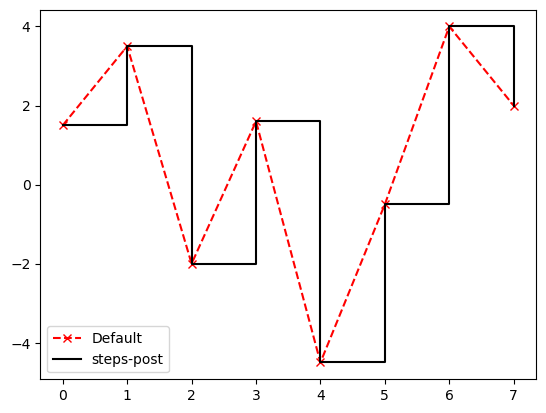

In [43]:
arr2 = np.array([1.5, 3.5, -2, 1.6, -4.5, -0.5, 4, 2])
plt.plot(arr2, color='r', marker='x', linestyle='dashed', label="Default")
#plt.plot(arr2, 'go-')
plt.plot(arr2, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend()

Text(0.5, 0, 'Stages')

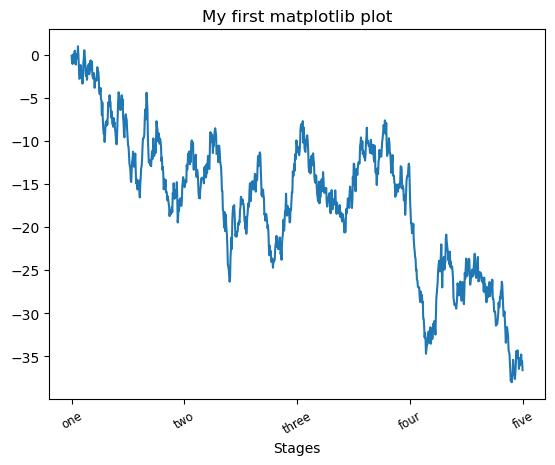

In [60]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')

ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

#props = {
#    'title': 'My FIRST matplotlib plot',
#    'xlabel': 'STAGES'
#}
#ax.set(**props)

C:\Users\johns88m\AppData\Local\Temp\ipykernel_14288\1039070411.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(randn(1000).cumsum(), 'k', label='one', color='r')
C:\Users\johns88m\AppData\Local\Temp\ipykernel_14288\1039070411.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot(randn(1000).cumsum(), 'k--', label='two', color='g')


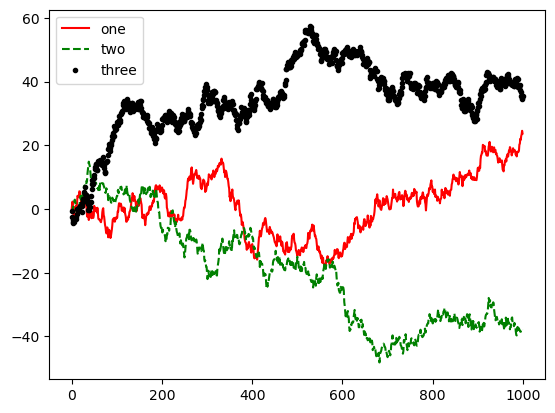

In [64]:
from numpy.random import randn
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one', color='r')
ax.plot(randn(1000).cumsum(), 'k--', label='two', color='g')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc='best')

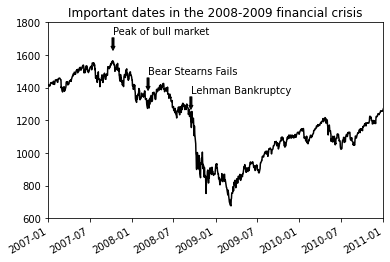

In [18]:
import pandas as pd
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])
ax.set_title('Important dates in the 2008-2009 financial crisis')

fig.savefig('figpath.png', dpi=400, bbox_inches='tight')

### Plotting with pandas and seaborn

o Series - Line Plot

    - Table 9-3. Series.plot method arguments

o Dataframe - Lines Plot

    - Table 9-4. DataFrame-specific plot arguments


[[ 1.66689268 -0.18100047 -0.49147321]
 [ 0.76157384 -2.62272285 -1.01082861]
 [ 1.19840226 -3.74346224 -2.26677091]
 [ 2.69325123 -4.74391035 -0.75627904]
 [ 2.30473979 -5.25508564 -1.06009497]
 [ 3.44226604 -4.74482977 -1.62333478]
 [ 4.45089163 -2.21091442 -1.55974185]
 [ 3.79945146 -3.75236534 -1.70751284]
 [ 2.4651889  -3.43129356 -0.3942657 ]
 [ 4.2808322  -3.38617305  1.57707702]]


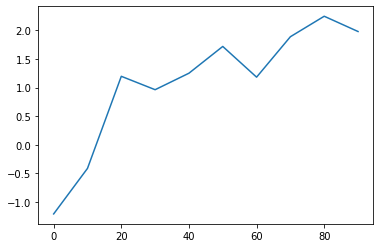

In [20]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()
# print(np.random.randn(10, 3).cumsum(0))
df = pd.DataFrame(np.random.randn(10, 3).cumsum(0), columns=['A', 'B', 'D'], index=np.arange(0, 100, 10))
# df.plot()

o Bar Plot

    - CSV file - https://raw.githubusercontent.com/wangruinju/python-for-data-analysis/master/pydata-book-2nd-edition/examples/tips.csv
    

<AxesSubplot: >

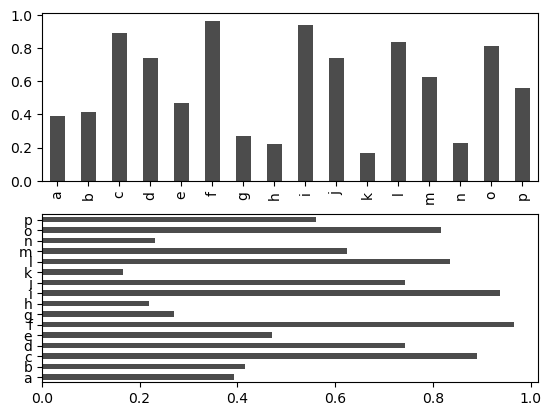

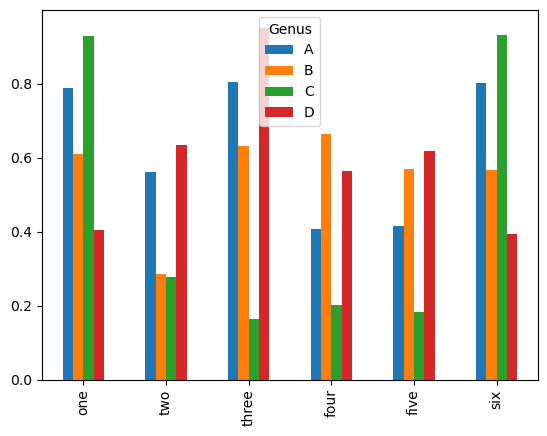

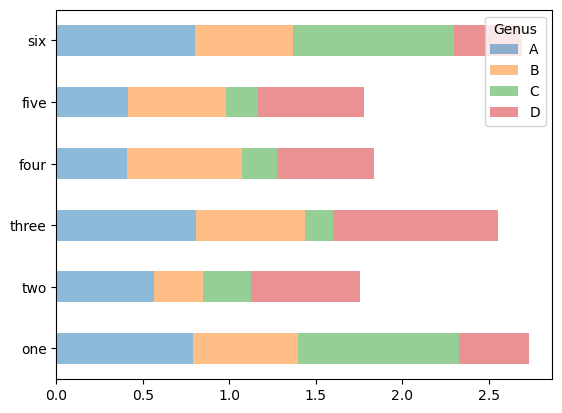

In [68]:
fig, axes = plt.subplots(2, 1)

data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
#print(list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

df = pd.DataFrame(np.random.rand(6, 4), index=['one', 'two', 'three', 'four', 'five', 'six'], columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
#print(df)
df.plot.bar()
df.plot.barh(stacked=True, alpha=0.5)

<AxesSubplot: xlabel='day'>

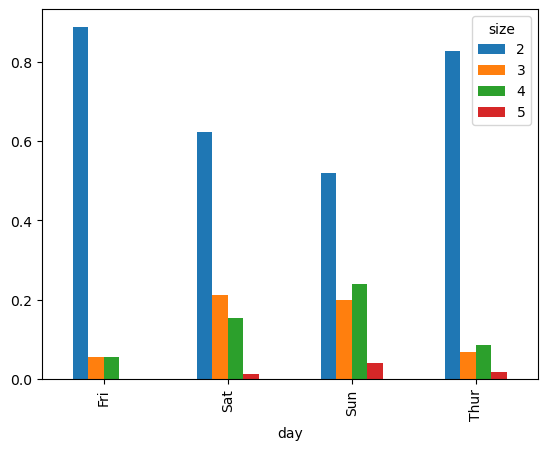

In [69]:
tips = pd.read_csv('tips.csv')
#print(tips.head())
party_counts = pd.crosstab(tips['day'], tips['size'])
#print(party_counts)
party_counts = party_counts.loc[:, 2:5]
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
#print(party_counts)
party_pcts.plot.bar()

### Using the seaborn package

o Useful with data that requires aggregation or summarization before making a plot

    - Histograms and Density Plots

    - Scatter or Point Plots
    
    - Facet Grids and Categorical Data
    
      - CSV File - https://raw.githubusercontent.com/statsmodels/statsmodels/main/statsmodels/datasets/macrodata/macrodata.csv


In [28]:
import seaborn as sns
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
#print(tips.head())
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')
#sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')
sns.set(style="whitegrid")

ModuleNotFoundError: No module named 'seaborn'

In [27]:
tips['tip_pct'].plot.hist(bins=100)

NameError: name 'tips' is not defined

<AxesSubplot: ylabel='Density'>

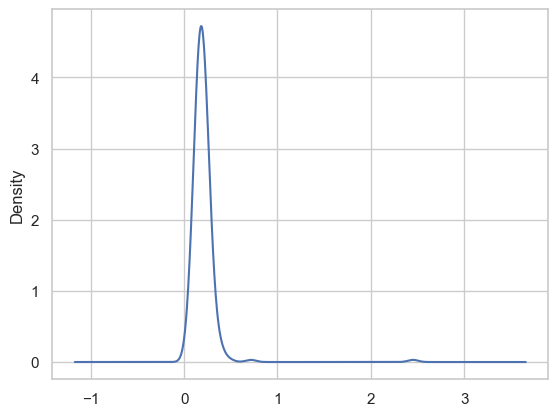

In [72]:
tips['tip_pct'].plot.density()

<AxesSubplot: ylabel='Density'>

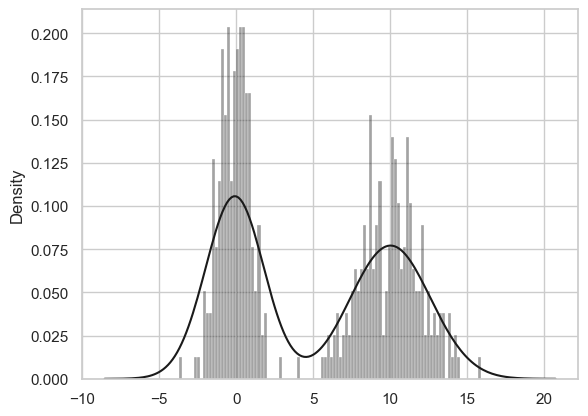

In [73]:
# with seaborn
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.histplot(values, bins=100, color='k', stat="density", alpha=0.4, kde=True, kde_kws={"cut": 3})
#sns.distplot(values, bins=100, color='k')

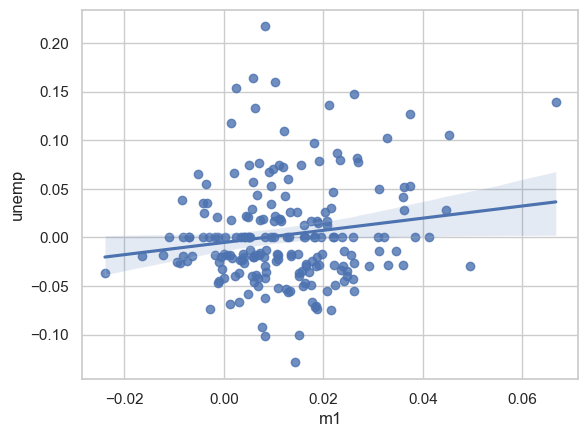

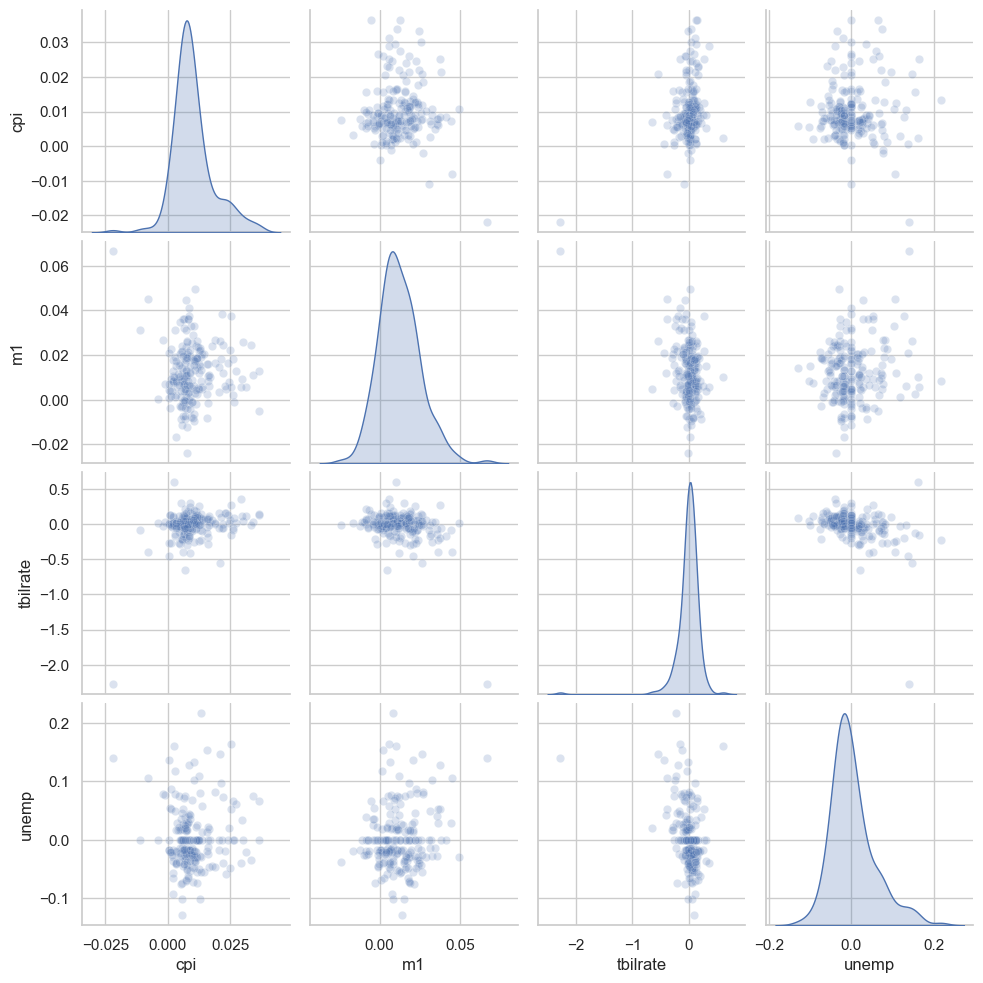

In [74]:
macro = pd.read_csv('macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data.tail()

ax = sns.regplot(x="m1", y="unemp", data=trans_data)
#ax.title("Changes in log(m1) versus log(unemp)")
sns.pairplot(trans_data, diag_kind="kde", plot_kws={"alpha": 0.2})


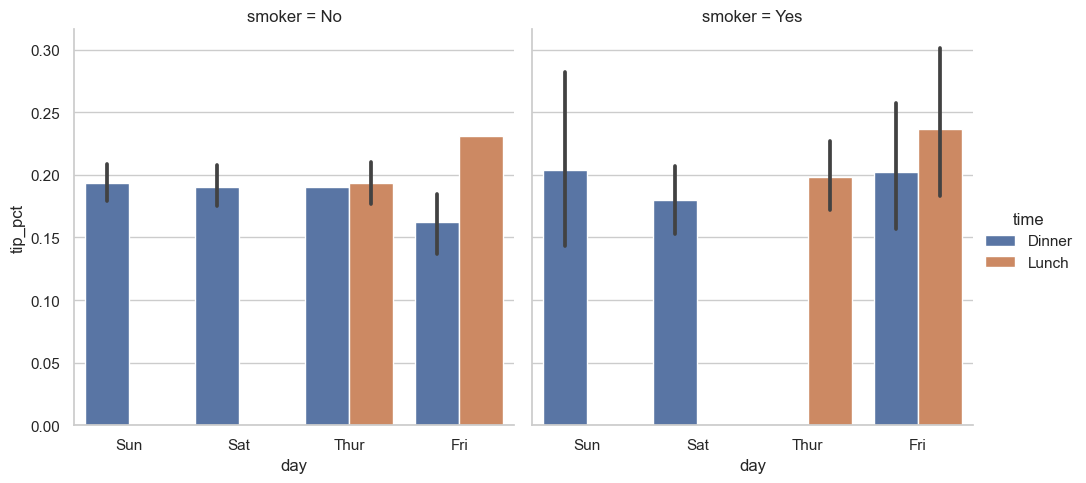

In [75]:
#sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1])
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1])

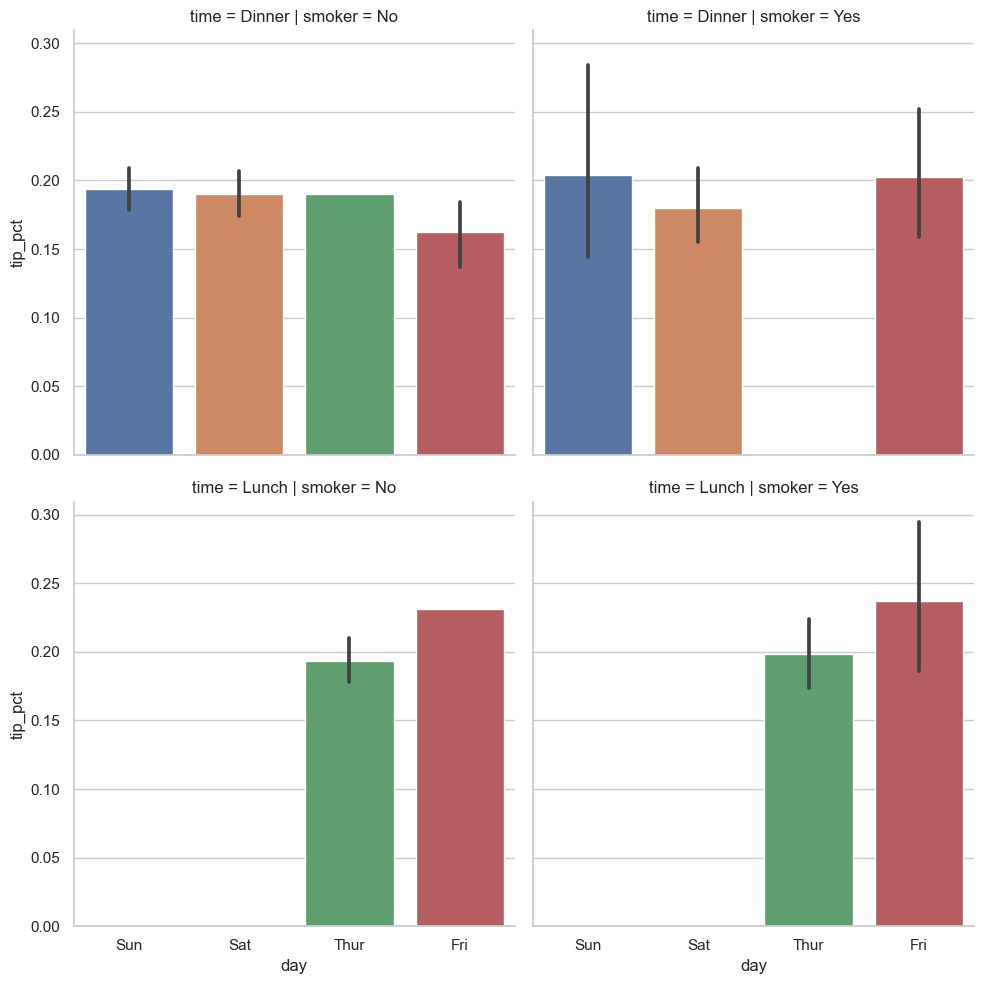

In [76]:
sns.catplot(x='day', y='tip_pct', row='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1])

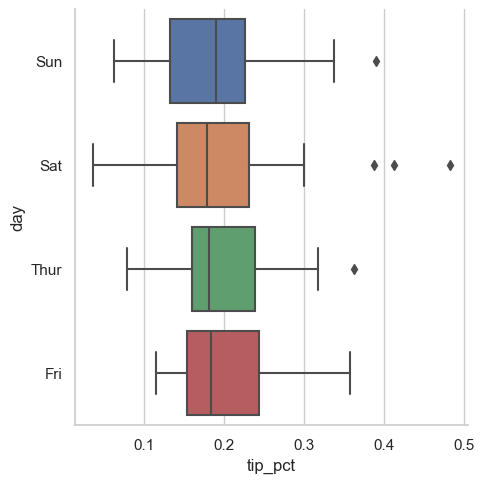

In [77]:
sns.catplot(x='tip_pct', y='day', kind='box', data=tips[tips.tip_pct < 0.5])

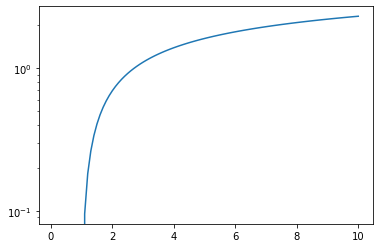

In [23]:
x = np.linspace(0.1, 10, 100)
y = np.log(x)

plt.plot(x, y)
plt.yscale('log')
plt.show()

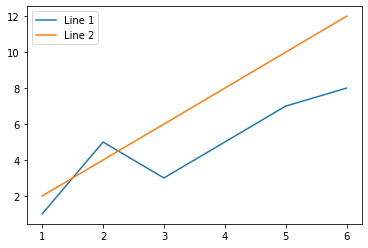

In [26]:
x = [1, 2, 3, 4, 5, 6]
y1 = [1, 5, 3, 5, 7, 8]
y2 = [2, 4, 6, 8, 10, 12]

plt.plot(x, y1, label='Line 1')
plt.plot(x, y2, label='Line 2')
plt.legend()
plt.show()

[  9.  51. 105. 190. 255. 206. 132.  36.  13.   3.]
[-2.88957923 -2.25789701 -1.62621479 -0.99453257 -0.36285035  0.26883187
  0.90051409  1.53219631  2.16387854  2.79556076  3.42724298]
<BarContainer object of 10 artists>


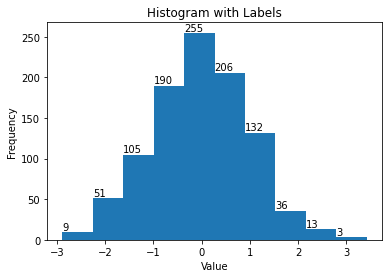

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Generate sample data
data = np.random.normal(0, 1, 1000)
# print(f'data: {data}')

# Create histogram
counts, bins, patches = plt.hist(data, bins=10)

print(counts)
print(bins)
print(patches)

# Add labels to histogram bars
for count, bin, patch in zip(counts, bins, patches):
    plt.text(bin, count, f'{count:.0f}', ha='left', va='bottom')
# plt.text()

plt.title('Histogram with Labels')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()



In [50]:
df = pd.read_csv('/datasetB.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/datasetB.csv'